In [0]:
import pandas as pd
import numpy as np

In [0]:
cancer = pd.read_csv('breastcancercoimbra.csv')

In [46]:
cancer

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [47]:
cancer.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [0]:
# Pemilihan pembanding yang akan digunakan dari data atribut
x = cancer[['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1']]

In [49]:
x

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [50]:
y = cancer['Classification']
y.unique()

array([1, 2])

In [51]:
# Testing = 30%, Training = 70%
from sklearn.model_selection import train_test_split as train_test
import math

x_train, x_test, y_train, y_test = train_test(x, y, test_size=0.3)
x_train

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
32,28,35.855815,87,8.576,1.840410,68.5102,4.794200,21.44366,358.624
81,81,31.640368,100,9.669,2.385020,38.8066,10.636525,29.55830,426.175
88,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.63080,1698.440
67,64,22.222222,98,5.700,1.377880,12.1905,4.783985,13.91245,395.976
93,49,32.461911,134,24.887,8.225983,42.3914,10.793940,5.76800,656.393
...,...,...,...,...,...,...,...,...,...
104,57,34.838148,95,12.548,2.940415,33.1612,2.364950,9.95420,655.834
89,58,29.154519,139,16.582,5.685415,22.8884,10.262660,13.97399,923.886
95,49,29.777778,70,8.396,1.449709,51.3387,10.731740,20.76801,602.486
75,43,26.562500,101,10.555,2.629602,9.8000,6.420295,16.10000,806.724


In [0]:
# Metode Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

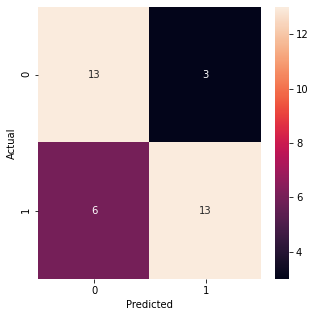

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
from sklearn.metrics import classification_report
print (classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           1       0.68      0.81      0.74        16
           2       0.81      0.68      0.74        19

    accuracy                           0.74        35
   macro avg       0.75      0.75      0.74        35
weighted avg       0.75      0.74      0.74        35

